In [1124]:
import pandas as pd
import seaborn as sb
import numpy as np
import matplotlib.pyplot as plt

In [1125]:
df=pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [1126]:
df.shape

(768, 9)

In [1127]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [1128]:
df=df.rename(columns={'BloodPressure':'BP','DiabetesPedigreeFunction':'DPF','SkinThickness':'S_T'})
df.columns

Index(['Pregnancies', 'Glucose', 'BP', 'S_T', 'Insulin', 'BMI', 'DPF', 'Age',
       'Outcome'],
      dtype='object')

In [1129]:
df.isnull().sum()

Pregnancies    0
Glucose        0
BP             0
S_T            0
Insulin        0
BMI            0
DPF            0
Age            0
Outcome        0
dtype: int64

In [1130]:
df.nunique()

Pregnancies     17
Glucose        136
BP              47
S_T             51
Insulin        186
BMI            248
DPF            517
Age             52
Outcome          2
dtype: int64

In [1131]:
df.Outcome.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [1132]:
df.duplicated().sum()

0

<AxesSubplot:xlabel='Outcome', ylabel='count'>

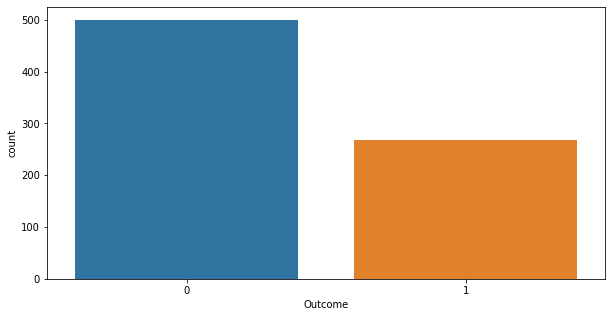

In [1133]:
plt.figure(figsize=(10,5))
sb.countplot(x='Outcome',data=df)

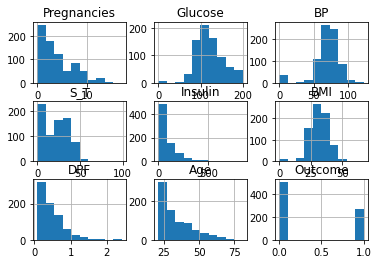

In [1134]:
df.hist()
plt.show()

<AxesSubplot:>

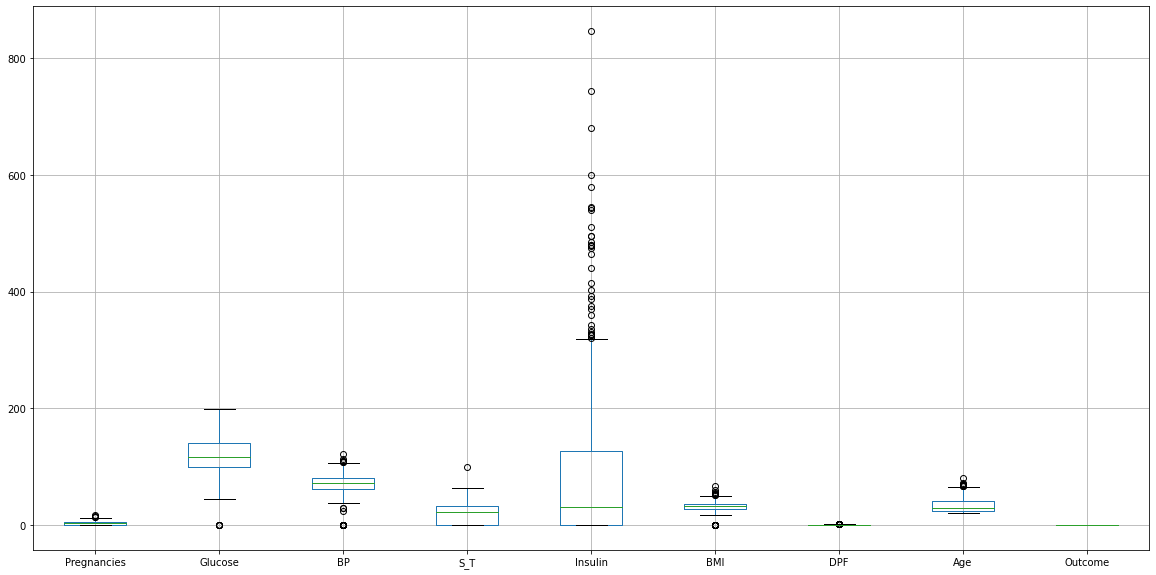

In [1135]:
plt.figure(figsize=(20,10))
df.boxplot()

In [1136]:
Q1=df[df.columns[7]].quantile(0.25)
Q3=df[df.columns[7]].quantile(0.75)
IQR=Q3-Q1
upperbound=Q3+(IQR*1.5)
upperbound

66.5

In [1137]:
df.Age.quantile(0.90)

51.0

<Figure size 720x360 with 0 Axes>

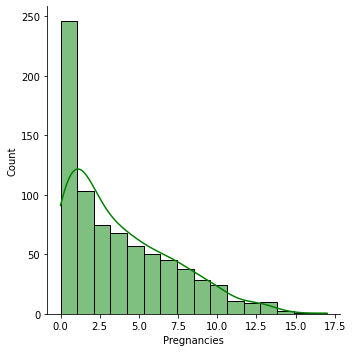

In [1138]:
plt.figure(figsize=(10,5))
sb.displot(df['Pregnancies'],kde=True,color='green')

<Figure size 720x360 with 0 Axes>

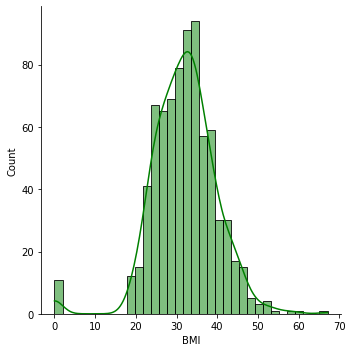

In [1139]:
plt.figure(figsize=(10,5))
sb.displot(df['BMI'],kde=True,color='green')

In [1140]:
"""fig, axes = plt.subplots(ncols=len(df.columns), figsize=(30,15))
for ax, col in zip(axes, df.columns):
  sb.distplot(df[col], ax=ax)
  plt.tight_layout() 
plt.show()"""

'fig, axes = plt.subplots(ncols=len(df.columns), figsize=(30,15))\nfor ax, col in zip(axes, df.columns):\n  sb.distplot(df[col], ax=ax)\n  plt.tight_layout() \nplt.show()'

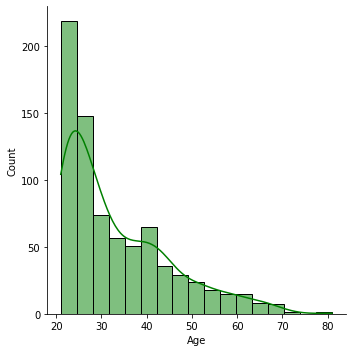

In [1141]:

sb.displot(df['Age'],kde=True,color='green')

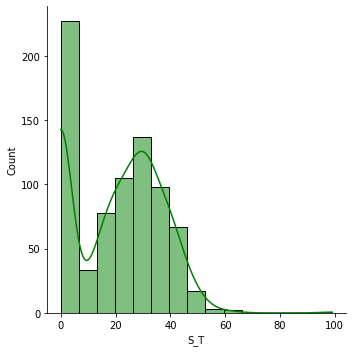

In [1142]:

sb.displot(df['S_T'],kde=True,color='green')

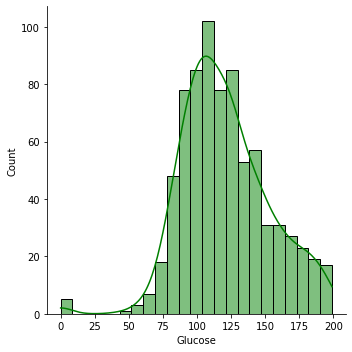

In [1143]:
sb.displot(df.Glucose,kde=True,color='green')

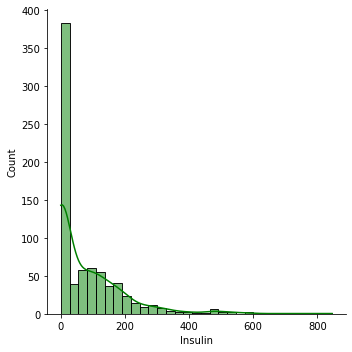

In [1144]:
sb.displot(df.Insulin,kde=True,color='green')

<AxesSubplot:xlabel='Insulin', ylabel='Density'>

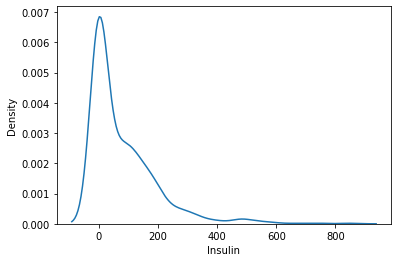

In [1145]:
sb.kdeplot(df.Insulin)

In [1146]:
#sb.pairplot(df,hue='Outcome')

<AxesSubplot:>

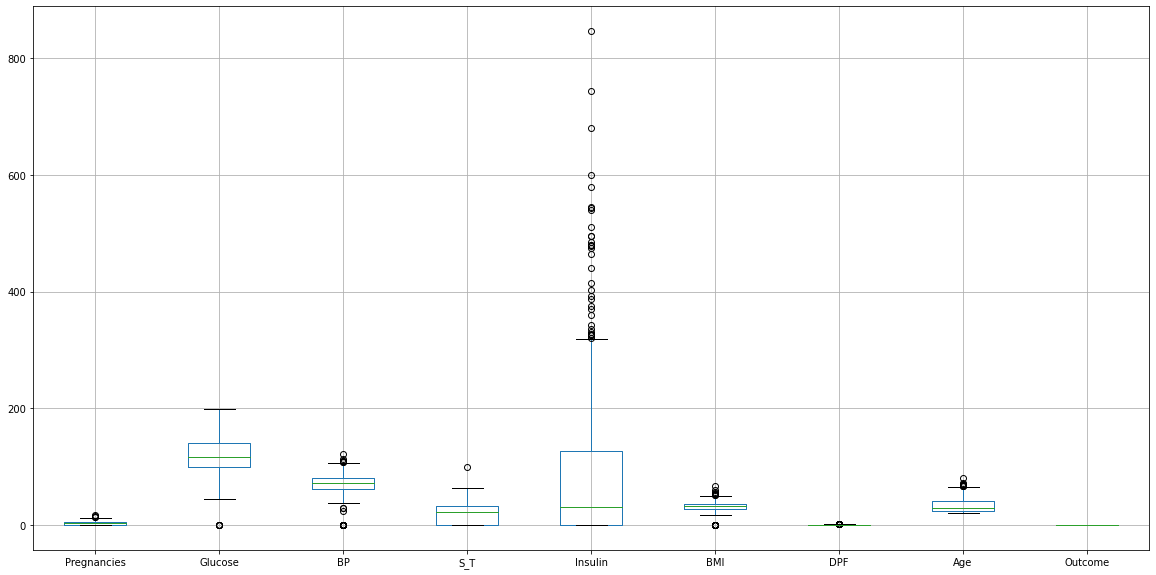

In [1147]:
plt.figure(figsize=(20,10))
df.boxplot()

In [1148]:
df[df['Glucose']==0]

,Pregnancies,Glucose,BP,S_T,Insulin,BMI,DPF,Age,Outcome
75,1,0,48,20,0,24.7,0.140,22,0
182,1,0,74,20,23,27.7,0.299,21,0
342,1,0,68,35,0,32.0,0.389,22,0
349,5,0,80,32,0,41.0,0.346,37,1
502,6,0,68,41,0,39.0,0.727,41,1


In [1149]:
df = df.drop(df[(df['Glucose'] == 0)].index)

In [1150]:
df.BP[df.BP==0].value_counts()

0    35
Name: BP, dtype: int64

In [1151]:
df.BP=np.where(df.BP==0,df.BP.median(),df.BP)

In [1152]:
q1 = df.BP.quantile(0.25)
q3 = df['BP'].quantile(0.75)
iqr = q3-q1
Lower_tail = q1 - 1.5 * iqr
Upper_tail = q3 + 1.5 * iqr

u = df[(df['BP'] > Upper_tail) | (df['BP'] < Lower_tail)] 
u = pd.DataFrame(u)
u.Outcome.value_counts()

0    8
1    6
Name: Outcome, dtype: int64

In [1153]:
df.BP=np.where(df.BP>Upper_tail,df.BP.median(),df.BP)
df.BP=np.where(df.BP<Lower_tail,df.BP.median(),df.BP)

In [1154]:
df.S_T[df.S_T==0].value_counts()

0    227
Name: S_T, dtype: int64

In [1155]:
df.S_T=np.where(df.S_T==0,df.S_T.median(),df.S_T)

In [1156]:
q1 = df.S_T.quantile(0.25)
q3 = df.S_T.quantile(0.75)
iqr = q3-q1
Lower_tail = q1 - 1.5 * iqr
Upper_tail = q3 + 1.5 * iqr

u = df[(df['S_T'] > Upper_tail) | (df['S_T'] < Lower_tail)] 
u = pd.DataFrame(u)
u.Outcome.value_counts()

0    18
1    17
Name: Outcome, dtype: int64

In [1157]:
df.S_T=np.where(df.S_T>df.S_T.quantile(0.90),df.S_T.quantile(0.90),df.S_T)
df.S_T=np.where(df.S_T<df.S_T.quantile(0.10),df.S_T.quantile(0.10),df.S_T)

In [1158]:
q1 = df.Insulin.quantile(0.25)
q3 = df.Insulin.quantile(0.75)
iqr = q3-q1
Lower_tail = q1 - 1.5 * iqr
Upper_tail = q3 + 1.5 * iqr

u = df[(df['Insulin'] > Upper_tail) | (df.Insulin < Lower_tail)] 
u = pd.DataFrame(u)
u.Outcome.value_counts()

1    18
0    15
Name: Outcome, dtype: int64

In [1159]:
df.Insulin=np.where(df.Insulin>df.Insulin.quantile(0.90),df.Insulin.quantile(0.90),df.Insulin)

In [1160]:
df.shape

(763, 9)

In [1161]:
df.BMI[df.BMI==0].value_counts()

0.0    11
Name: BMI, dtype: int64

In [1162]:
df=df.drop(df[df.BMI==0].index)

In [1163]:
df.BMI=np.where(df.BMI>df.BMI.quantile(0.90),df.BMI.quantile(0.90),df.BMI)
#df.BMI=np.where(df.BMI<df.BMI.quantile(0.10),df.BMI.quantile(0.10),df.BMI)

In [1164]:
q1 = df.Age.quantile(0.25)
q3 = df.Age.quantile(0.75)
iqr = q3-q1
Lower_tail = q1 - 1.5 * iqr
Upper_tail = q3 + 1.5 * iqr

u = df[(df.Age > Upper_tail)] 
u = pd.DataFrame(u)
u
#u.Outcome.value_counts()

,Pregnancies,Glucose,BP,S_T,Insulin,BMI,DPF,Age,Outcome
123,5,132,80.0,23.0,0.0,26.8,0.186,69,0
363,4,146,78.0,23.0,0.0,38.5,0.520,67,1
453,2,119,72.0,23.0,0.0,19.6,0.832,72,0
459,9,134,74.0,33.0,60.0,25.9,0.460,81,0
489,8,194,80.0,23.0,0.0,26.1,0.551,67,0
537,0,57,60.0,23.0,0.0,21.7,0.735,67,0
666,4,145,82.0,18.0,0.0,32.5,0.235,70,1
674,8,91,82.0,23.0,0.0,35.6,0.587,68,0


In [1165]:
df.Age=np.where(df.Age>df.Age.quantile(0.90),df.Age.quantile(0.90),df.Age)

In [1166]:
q1 = df.Pregnancies.quantile(0.25)
q3 = df.Pregnancies.quantile(0.75)
iqr = q3-q1
Lower_tail = q1 - 1.5 * iqr
Upper_tail = q3 + 1.5 * iqr

u = df[(df.Pregnancies > Upper_tail)] 
u = pd.DataFrame(u)
u

,Pregnancies,Glucose,BP,S_T,Insulin,BMI,DPF,Age,Outcome
88,15,136,70.0,32.0,110.0,37.1,0.153,43.0,1
159,17,163,72.0,40.0,114.0,40.9,0.817,47.0,1
298,14,100,78.0,25.0,184.0,36.6,0.412,46.0,1
455,14,175,62.0,30.0,0.0,33.6,0.212,38.0,1


In [1167]:
df.Pregnancies=np.where(df.Pregnancies>Upper_tail,df.Pregnancies.median(),df.Pregnancies)

In [1168]:
q1 = df.DPF.quantile(0.25)
q3 = df.DPF.quantile(0.75)
iqr = q3-q1
Lower_tail = q1 - 1.5 * iqr
Upper_tail = q3 + 1.5 * iqr

u = df[(df.DPF > Upper_tail)] 
u = pd.DataFrame(u)
u.Outcome.value_counts()

1    17
0    11
Name: Outcome, dtype: int64

In [1169]:
df.DPF=np.where(df.DPF>Upper_tail,df.DPF.median(),df.DPF)

<AxesSubplot:>

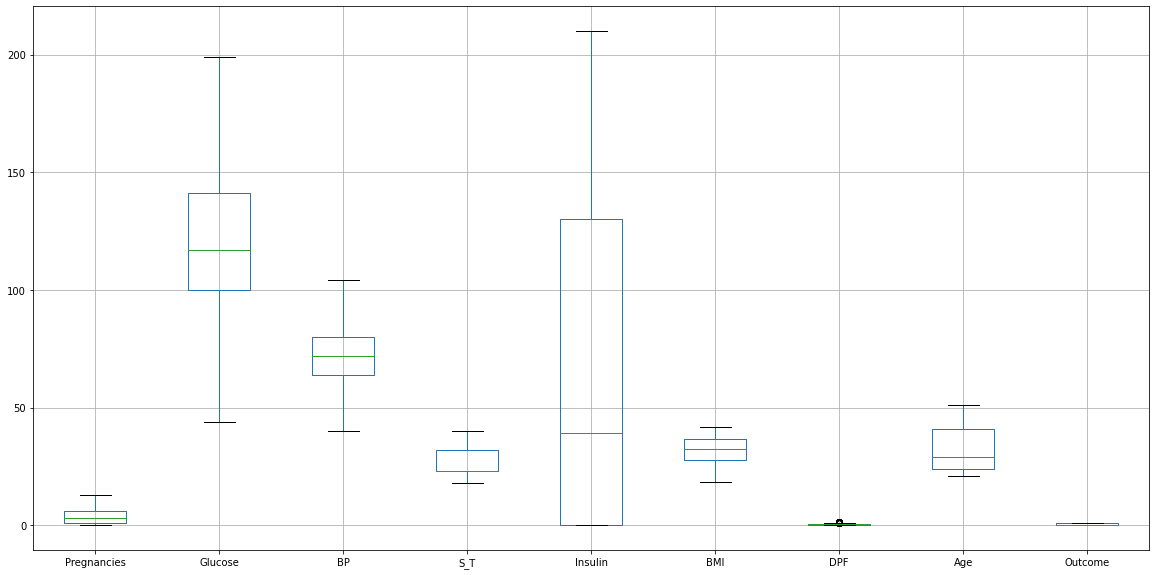

In [1170]:
plt.figure(figsize=(20,10))
df.boxplot()

In [1171]:
df.Age.quantile(0.90)

51.0

In [1172]:
df.corr()

,Pregnancies,Glucose,BP,S_T,Insulin,BMI,DPF,Age,Outcome
Pregnancies,1.000000,0.115157,0.184335,0.033606,-0.104822,0.025669,0.003476,0.601120,0.193418
Glucose,0.115157,1.000000,0.209849,0.149178,0.265600,0.236836,0.075531,0.266252,0.494190
BP,0.184335,0.209849,1.000000,0.151899,-0.062595,0.266219,0.032225,0.330070,0.162710
S_T,0.033606,0.149178,0.151899,1.000000,0.318087,0.560966,0.109238,0.042052,0.175863
Insulin,-0.104822,0.265600,-0.062595,0.318087,1.000000,0.203449,0.202398,-0.080860,0.110847
BMI,0.025669,0.236836,0.266219,0.560966,0.203449,1.000000,0.127777,0.078112,0.307582
DPF,0.003476,0.075531,0.032225,0.109238,0.202398,0.127777,1.000000,0.042372,0.150361
Age,0.601120,0.266252,0.330070,0.042052,-0.080860,0.078112,0.042372,1.000000,0.277428
Outcome,0.193418,0.494190,0.162710,0.175863,0.110847,0.307582,0.150361,0.277428,1.000000


<AxesSubplot:>

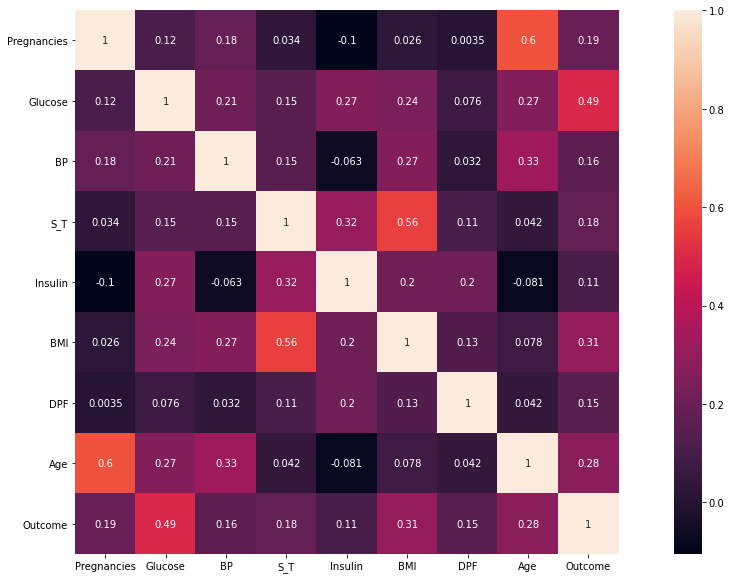

In [1173]:
plt.figure(figsize=(20,10))
sb.heatmap(df.corr(),annot=True,square=True)

In [1174]:
df.describe()

,Pregnancies,Glucose,BP,S_T,Insulin,BMI,DPF,Age,Outcome
count,752.000000,752.000000,752.000000,752.000000,752.000000,752.000000,752.000000,752.000000,752.000000
mean,3.787234,121.941489,72.101064,27.200798,67.557181,32.044441,0.429875,32.525266,0.351064
std,3.274393,30.601198,10.902810,7.165225,77.763902,6.049517,0.246044,9.941876,0.477621
min,0.000000,44.000000,40.000000,18.000000,0.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,23.000000,0.000000,27.500000,0.244000,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,39.000000,32.300000,0.376500,29.000000,0.000000
75%,6.000000,141.000000,80.000000,32.000000,130.000000,36.600000,0.583000,41.000000,1.000000
max,13.000000,199.000000,104.000000,40.000000,210.000000,41.770000,1.191000,51.000000,1.000000


In [1175]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler,MinMaxScaler,RobustScaler
from sklearn.svm import SVC

In [1176]:
X=df.iloc[:,:-1].values
y=df.iloc[:,-1].values

In [1177]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

In [1178]:
mmc=StandardScaler()
X_train=mmc.fit_transform(X_train)
X_test=mmc.transform(X_test)
X_train

array([[-1.13582865, -0.86609238,  1.2014625 , ...,  0.91212353,
        -0.74146024, -0.84959802],
       [-0.51889868, -0.30475859, -0.32970157, ...,  0.37418902,
        -0.46843976, -0.6468147 ],
       [-1.13582865,  0.09147702, -1.41052327, ..., -1.63083963,
         0.08161621, -1.15377301],
       ...,
       [-0.82736366,  2.46889073,  0.39084623, ...,  0.76541412,
         1.77996421, -0.34263971],
       [ 0.40649629,  0.52073228,  0.03057233, ...,  1.62447923,
        -0.82176039,  0.46849359],
       [-0.82736366, -1.46044581, -1.41052327, ...,  0.24378065,
        -0.21950932, -0.84959802]])

In [1179]:
svc=SVC()
svc.fit(X_train,y_train)
svc.score(X_test,y_test)

0.7814569536423841

In [1180]:
from sklearn.model_selection import GridSearchCV
parameters = [{'kernel': ['linear','rbf','poly'],'C':np.logspace(-4,1,5)}]
              
grid_search = GridSearchCV(estimator = svc,
                           param_grid = parameters,
                          
                           cv = 10,verbose=True,
                           n_jobs = -1)
grid_search.fit(X_train, y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_

Fitting 10 folds for each of 15 candidates, totalling 150 fits


In [1181]:
best_accuracy

0.7621038251366119

In [1182]:
best_parameters

{'C': 0.5623413251903491, 'kernel': 'linear'}

In [1183]:
svc=SVC(C=0.56,kernel='linear')
svc.fit(X_train,y_train)
svc.score(X_test,y_test)

0.8211920529801324